# Homework 4

## 2. Grouping songs together!

### The final goal is to group songs into similar genres!

__Libraries:__

In [10]:
import pandas as pd
import numpy as np
import librosa
from tqdm import tqdm

You are supposed to create one single data set by merging __tracks.csv, features.csv and echonest.csv__. It's your job to find the correct key to join your data sets together. You should end up with a data set of ~13K rows.

First of all I will import using pandas the csv file.

In [2]:
echonest = pd.read_csv('echonest.csv')

In [3]:
features = pd.read_csv('features.csv')

In [4]:
tracks = pd.read_csv('tracks.csv')

Let's get an info on the data:

In [5]:
df_list = [echonest, features, tracks]

for df in df_list:
    print(df.shape)

(13129, 250)
(106574, 519)
(106574, 53)


We can see that the only shape share by the different dataframes is only the number of rows of the features and tracks one.

Now we can search if they share common columns for which we can start our merging.

In [6]:
col = []

for df in df_list:
    col.append(set(df.columns))

In [7]:
common_labels = set.intersection(*col)
common_labels

{'track_id'}

We can see that the only common features is the track_id, let's see the common part share by that column.

In [8]:
import functions

In [9]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

In [10]:
echonestDF = functions.make_df("", echonest["track_id"])
featuresDF = functions.make_df("", features["track_id"])
trackDF = functions.make_df("", tracks["track_id"])

display("echonestDF.head()","featuresDF.head()","trackDF.head()")

""
track_id
2
3
5
10
134
""
track_id
2
3


The are common values in the track id, i.e the column means the same for each dataset and we can marge then along the row with similar value.

In [11]:
dataset = pd.concat([echonest, features, tracks], axis=1, join = 'inner')

In [12]:
dataset = dataset.loc[:,~dataset.columns.duplicated()]  # removing duplicate columns

In [13]:
dataset.shape

(13129, 820)

We achieve a dataframe of ~13k rows

Let's view all the columns of the dataset

In [77]:
pd.set_option('display.max_columns', None)

In [15]:
dataset.head(3)

,track_id,audio_features_acousticness,audio_features_danceability,audio_features_energy,audio_features_instrumentalness,audio_features_liveness,audio_features_speechiness,audio_features_tempo,audio_features_valence,metadata_album_date,metadata_album_name,metadata_artist_latitude,metadata_artist_location,metadata_artist_longitude,metadata_artist_name,metadata_release,ranks_artist_discovery_rank,ranks_artist_familiarity_rank,ranks_artist_hotttnesss_rank,ranks_song_currency_rank,ranks_song_hotttnesss_rank,social_features_artist_discovery,social_features_artist_familiarity,social_features_artist_hotttnesss,social_features_song_currency,social_features_song_hotttnesss,temporal_features_000,temporal_features_001,temporal_features_002,temporal_features_003,temporal_features_004,temporal_features_005,temporal_features_006,temporal_features_007,temporal_features_008,temporal_features_009,temporal_features_010,temporal_features_011,temporal_features_012,temporal_features_013,temporal_features_014,temporal_features_015,temporal_features_016,temporal_features_017,temporal_features_018,temporal_features_019,temporal_features_020,temporal_features_021,temporal_features_022,temporal_features_023,temporal_features_024,temporal_features_025,temporal_features_026,temporal_features_027,temporal_features_028,temporal_features_029,temporal_features_030,temporal_features_031,temporal_features_032,temporal_features_033,temporal_features_034,temporal_features_035,temporal_features_036,temporal_features_037,temporal_features_038,temporal_features_039,temporal_features_040,temporal_features_041,temporal_features_042,temporal_features_043,temporal_features_044,temporal_features_045,temporal_features_046,temporal_features_047,temporal_features_048,temporal_features_049,temporal_features_050,temporal_features_051,temporal_features_052,temporal_features_053,temporal_features_054,temporal_features_055,temporal_features_056,temporal_features_057,temporal_features_058,temporal_features_059,temporal_features_060,temporal_features_061,temporal_features_062,temporal_features_063,temporal_features_064,temporal_features_065,temporal_features_066,temporal_features_067,temporal_features_068,temporal_features_069,temporal_features_070,temporal_features_071,temporal_features_072,temporal_features_073,temporal_features_074,temporal_features_075,temporal_features_076,temporal_features_077,temporal_features_078,temporal_features_079,temporal_features_080,temporal_features_081,temporal_features_082,temporal_features_083,temporal_features_084,temporal_features_085,temporal_features_086,temporal_features_087,temporal_features_088,temporal_features_089,temporal_features_090,temporal_features_091,temporal_features_092,temporal_features_093,temporal_features_094,temporal_features_095,temporal_features_096,temporal_features_097,temporal_features_098,temporal_features_099,temporal_features_100,temporal_features_101,temporal_features_102,temporal_features_103,temporal_features_104,temporal_features_105,temporal_features_106,temporal_features_107,temporal_features_108,temporal_features_109,temporal_features_110,temporal_features_111,temporal_features_112,temporal_features_113,temporal_features_114,temporal_features_115,temporal_features_116,temporal_features_117,temporal_features_118,temporal_features_119,temporal_features_120,temporal_features_121,temporal_features_122,temporal_features_123,temporal_features_124,temporal_features_125,temporal_features_126,temporal_features_127,temporal_features_128,temporal_features_129,temporal_features_130,temporal_features_131,temporal_features_132,temporal_features_133,temporal_features_134,temporal_features_135,temporal_features_136,temporal_features_137,temporal_features_138,temporal_features_139,temporal_features_140,temporal_features_141,temporal_features_142,temporal_features_143,temporal_features_144,temporal_features_145,temporal_features_146,temporal_features_147,temporal_features_148,temporal_features_149,temporal_features_150,tempor

__Remove all the columns with NaN value:__

In [16]:
NaN_columns = dataset.isna().sum() / dataset.shape[0] 

In [17]:
NaN_columns[NaN_columns > 0].nsmallest(10)

artist_date_created         0.001295
track_language_code         0.002742
track_license               0.003961
album_title                 0.014396
album_date_created          0.026430
album_type                  0.032523
album_information           0.211745
album_date_released         0.229263
artist_website              0.246401
metadata_artist_latitude    0.255846
dtype: float64

In [18]:
Missing50 = NaN_columns[NaN_columns > 50/100]  # view 50% of missing data
print(Missing50)
print("\nMinimums percentage:\n",Missing50.nsmallest(3))

metadata_album_date              0.793054
metadata_album_name              0.781248
ranks_artist_discovery_rank      0.784827
ranks_artist_familiarity_rank    0.784827
ranks_artist_hotttnesss_rank     0.784904
ranks_song_currency_rank         0.845152
ranks_song_hotttnesss_rank       0.831975
album_engineer                   0.685201
album_producer                   0.665854
artist_active_year_begin         0.653591
artist_active_year_end           0.912179
artist_associated_labels         0.746287
artist_related_projects          0.764415
artist_wikipedia_page            0.869373
track_composer                   0.950796
track_date_recorded              0.656943
track_information                0.909666
track_lyricist                   0.994287
track_publisher                  0.989108
dtype: float64

Minimums percentage:
 artist_active_year_begin    0.653591
track_date_recorded         0.656943
album_producer              0.665854
dtype: float64


In [19]:
Missing50 = list(Missing50.index.values)
Missing50

['metadata_album_date',
 'metadata_album_name',
 'ranks_artist_discovery_rank',
 'ranks_artist_familiarity_rank',
 'ranks_artist_hotttnesss_rank',
 'ranks_song_currency_rank',
 'ranks_song_hotttnesss_rank',
 'album_engineer',
 'album_producer',
 'artist_active_year_begin',
 'artist_active_year_end',
 'artist_associated_labels',
 'artist_related_projects',
 'artist_wikipedia_page',
 'track_composer',
 'track_date_recorded',
 'track_information',
 'track_lyricist',
 'track_publisher']

__Removing empty columns:__

In [20]:
Empty = (dataset == '[]' ).sum(axis = 0) / dataset.shape[0] 
EmptyCols = Empty[Empty > 0]

In [21]:
EmptyCols

album_tags          0.918349
artist_tags         0.005332
track_genres        0.015538
track_genres_all    0.015538
track_tags          0.916064
dtype: float64

In [22]:
EmptyCols = list(Empty[Empty > 90/100].index.values) # only the 90% of missing data
EmptyCols

['album_tags', 'track_tags']

__Removing columns we cannot use:__

In [23]:
genreDrop = ['track_genres_all', 'track_genres', 'track_genre_top' ]
dataset.loc[:, genreDrop].head()

,track_genres_all,track_genres,track_genre_top
0,[21],[21],Hip-Hop
1,[21],[21],Hip-Hop
2,[21],[21],Hip-Hop
3,[10],[10],Pop
4,"[17, 10, 76, 103]","[76, 103]",NaN


In [24]:
dataset['track_genre_top'].unique()

array(['Hip-Hop', 'Pop', nan, 'Rock', 'Experimental', 'Folk', 'Jazz',
       'Electronic', 'Spoken', 'International', 'Soul-RnB', 'Blues',
       'Country', 'Classical', 'Old-Time / Historic', 'Instrumental',
       'Easy Listening'], dtype=object)

There are one column that the creator of the dataset use for let us do classification, we can't use it.

In [25]:
splitDrop = ['set_split', 'set_subset']
print(dataset.set_split.unique())

['training' 'validation' 'test']


In [26]:
dataset.loc[:, splitDrop].head()

,set_split,set_subset
0,training,small
1,training,medium
2,training,small
3,training,small
4,training,large


__About: The location__

In [27]:
dataset.loc[:, ['artist_location','artist_latitude', 'artist_longitude',
                'metadata_artist_location', 'metadata_artist_latitude', 'metadata_artist_longitude']].head(5)

,artist_location,artist_latitude,artist_longitude,metadata_artist_location,metadata_artist_latitude,metadata_artist_longitude
0,New Jersey,40.058324,-74.405661,"Georgia, US",32.6783,-83.2230
1,New Jersey,40.058324,-74.405661,"Georgia, US",32.6783,-83.2230
2,New Jersey,40.058324,-74.405661,"Georgia, US",32.6783,-83.2230
3,NaN,NaN,NaN,"Philadelphia, PA, US",39.9523,-75.1624
4,Colchester England,51.895927,0.891874,"Georgia, US",32.6783,-83.2230


In [28]:
print("meta: ", dataset['metadata_artist_location'].isna().sum(), "\nNo_meta: ",
      dataset['artist_location'].isna().sum())

meta:  3359 
No_meta:  4884


I want to fill the smaller variables, than I will fill the metadata variable with 0.

In [29]:
location = ['metadata_artist_latitude', 'metadata_artist_longitude']
dataset[location] = dataset[location].fillna(0)

Merging the column in a unique column that store the Country

In [30]:
def CountryTE(row):
    try:
         out = functions.country("{}, {}".format(row['metadata_artist_latitude'],
                                       row['metadata_artist_longitude']))
    except:
         out = "NA"
    return out

In [68]:
dataset["Country"] = dataset.progress_apply(lambda row : CountryTE(row), axis=1)

  0%|          | 0/13129 [00:00<?, ?it/s]

In [31]:
# loading the Country.csv to avoid re-do all the parsing location

In [32]:
country = pd.read_csv('Country_entries.csv', usecols = ["Country"])

In [33]:
dataset["Country"] = country

In [34]:
dataset.loc[:, ['track_id',"Country"]].head(14)

,track_id,Country
0,2,United States
1,3,United States
2,5,United States
3,10,United States
4,134,United States
5,139,United States
6,140,United States
7,141,NaN
8,142,United States
9,144,United States


Replace the missing data with NA

In [35]:
dataset["Country"] = dataset["Country"].fillna("NA")

In [36]:
dataset["Country"].head(15)

0     United States
1     United States
2     United States
3     United States
4     United States
5     United States
6     United States
7                NA
8     United States
9     United States
10    United States
11    United States
12    United States
13               NA
14               NA
Name: Country, dtype: object

In [37]:
print(dataset["Country"].unique())

['United States' 'NA' 'Canada' 'Colombia' 'España' '日本' 'Éire / Ireland'
 'United Kingdom' 'France' 'Sverige' 'Brasil' 'Nederland' 'Philippines'
 'België / Belgique / Belgien' 'Indonesia' 'México' 'Россия' 'Australia'
 'Italia' 'Україна' 'Türkiye' 'ישראל' 'România' 'Norge' 'Venezuela'
 'Côte d’Ivoire' 'ኢትዮጵያ' 'Österreich' 'Chile' 'Latvija' 'Deutschland'
 'Danmark' 'South Africa' 'Hrvatska' 'Polska' 'Česko' 'Argentina' 'Rwanda'
 'Magyarország' 'New Zealand / Aotearoa' 'Србија'
 'Schweiz/Suisse/Svizzera/Svizra' 'Suomi / Finland' 'India' 'Shqipëria'
 '中国' 'Lietuva' 'Costa Rica' 'საქართველო' 'Malaysia' '대한민국' 'Panamá'
 'Mauritius' 'The Bahamas' 'Mali' '臺灣' 'Ελλάς' 'Guatemala' 'Slovensko'
 'Uruguay' 'Бългaрия' 'Sénégal' 'ประเทศไทย' 'Singapore' 'Bolivia' 'Ísland'
 'Portugal' 'República Dominicana' 'Slovenija' 'Беларусь' 'Perú'
 'Lëtzebuerg' 'Jamaica']


In [38]:
LocationDrop = ['artist_location','artist_latitude', 'artist_longitude',
                'metadata_artist_location', 'metadata_artist_latitude', 'metadata_artist_longitude']

__About: the language:__

In [39]:
language = dataset.track_language_code.unique()
language

array(['en', 'es', nan, 'fi', 'pt', 'tr', 'sw', 'el', 'ar', 'pl', 'id',
       'tw', 'eu', 'ms', 'fr', 'ty', 'hy', 'hi', 'vi', 'ja', 'tl', 'it',
       'my', 'gu', 'zh', 'uk', 'az', 'sr', 'lt', 'th', 'bg', 'de', 'no',
       'ko', 'uz', 'ka', 'ha', 'sk', 'nl', 'bm'], dtype=object)

We can see a NaN value so we will refill it whit a "NA"

In [40]:
dataset.track_language_code = dataset.track_language_code.fillna("NA")
language = dataset.track_language_code.unique()

__About: artist name__

In [41]:
art = ['metadata_artist_name','metadata_release','artist_name']

In [42]:
dataset[art].head(10) # decide to store only "metadata_artist_name","metadata_release"

,metadata_artist_name,metadata_release,artist_name
0,AWOL,AWOL - A Way Of Life,AWOL
1,AWOL,AWOL - A Way Of Life,AWOL
2,AWOL,AWOL - A Way Of Life,AWOL
3,Kurt Vile,Constant Hitmaker,Kurt Vile
4,AWOL,AWOL - A Way Of Life,Nicky Cook
5,Alec K. Redfearn and the Eyesores,Every Man For Himself,Nicky Cook
6,Alec K. Redfearn and the Eyesores,The Blind Spot,Nicky Cook
7,Alec K. Redfearn and the Eyesores,Every Man For Himself,Nicky Cook
8,Alec K. Redfearn and the Eyesores,The Quiet Room,Nicky Cook
9,Amoebic Ensemble,Amoebiasis,AWOL


# Merged and clean dataset

In [43]:
df = dataset.copy()

In [44]:
df = df.drop(columns = Missing50 )
df = df.drop(columns = EmptyCols)
df = df.drop(columns = genreDrop )
df = df.drop(columns = splitDrop)
df = df.drop(columns = LocationDrop)
df = df.drop(columns = 'artist_name')

In [45]:
print("Cleaned: {}".format(df.shape), "Original: {}".format(dataset.shape))

Cleaned: (13129, 788) Original: (13129, 821)


In [46]:
df.head(2)

,track_id,audio_features_acousticness,audio_features_danceability,audio_features_energy,audio_features_instrumentalness,audio_features_liveness,audio_features_speechiness,audio_features_tempo,audio_features_valence,metadata_artist_name,metadata_release,social_features_artist_discovery,social_features_artist_familiarity,social_features_artist_hotttnesss,social_features_song_currency,social_features_song_hotttnesss,temporal_features_000,temporal_features_001,temporal_features_002,temporal_features_003,temporal_features_004,temporal_features_005,temporal_features_006,temporal_features_007,temporal_features_008,temporal_features_009,temporal_features_010,temporal_features_011,temporal_features_012,temporal_features_013,temporal_features_014,temporal_features_015,temporal_features_016,temporal_features_017,temporal_features_018,temporal_features_019,temporal_features_020,temporal_features_021,temporal_features_022,temporal_features_023,temporal_features_024,temporal_features_025,temporal_features_026,temporal_features_027,temporal_features_028,temporal_features_029,temporal_features_030,temporal_features_031,temporal_features_032,temporal_features_033,temporal_features_034,temporal_features_035,temporal_features_036,temporal_features_037,temporal_features_038,temporal_features_039,temporal_features_040,temporal_features_041,temporal_features_042,temporal_features_043,temporal_features_044,temporal_features_045,temporal_features_046,temporal_features_047,temporal_features_048,temporal_features_049,temporal_features_050,temporal_features_051,temporal_features_052,temporal_features_053,temporal_features_054,temporal_features_055,temporal_features_056,temporal_features_057,temporal_features_058,temporal_features_059,temporal_features_060,temporal_features_061,temporal_features_062,temporal_features_063,temporal_features_064,temporal_features_065,temporal_features_066,temporal_features_067,temporal_features_068,temporal_features_069,temporal_features_070,temporal_features_071,temporal_features_072,temporal_features_073,temporal_features_074,temporal_features_075,temporal_features_076,temporal_features_077,temporal_features_078,temporal_features_079,temporal_features_080,temporal_features_081,temporal_features_082,temporal_features_083,temporal_features_084,temporal_features_085,temporal_features_086,temporal_features_087,temporal_features_088,temporal_features_089,temporal_features_090,temporal_features_091,temporal_features_092,temporal_features_093,temporal_features_094,temporal_features_095,temporal_features_096,temporal_features_097,temporal_features_098,temporal_features_099,temporal_features_100,temporal_features_101,temporal_features_102,temporal_features_103,temporal_features_104,temporal_features_105,temporal_features_106,temporal_features_107,temporal_features_108,temporal_features_109,temporal_features_110,temporal_features_111,temporal_features_112,temporal_features_113,temporal_features_114,temporal_features_115,temporal_features_116,temporal_features_117,temporal_features_118,temporal_features_119,temporal_features_120,temporal_features_121,temporal_features_122,temporal_features_123,temporal_features_124,temporal_features_125,temporal_features_126,temporal_features_127,temporal_features_128,temporal_features_129,temporal_features_130,temporal_features_131,temporal_features_132,temporal_features_133,temporal_features_134,temporal_features_135,temporal_features_136,temporal_features_137,temporal_features_138,temporal_features_139,temporal_features_140,temporal_features_141,temporal_features_142,temporal_features_143,temporal_features_144,temporal_features_145,temporal_features_146,temporal_features_147,temporal_features_148,temporal_features_149,temporal_features_150,temporal_features_151,temporal_features_152,temporal_features_153,temporal_features_154,temporal_features_155,temporal_features_156,temporal_features_157,temporal_features_158,temporal_features_159,temporal_features_160,temporal_features_161,temporal_features_1

In [47]:
df.isna().sum().nlargest(13)  # all can fillable with "NA"

artist_members                 6357
artist_bio                     3535
artist_website                 3235
album_date_released            3010
album_information              2780
album_type                      427
album_date_created              347
album_title                     189
track_license                    52
artist_date_created              17
track_id                          0
audio_features_acousticness       0
audio_features_danceability       0
dtype: int64

In [48]:
df = df.fillna("NA")

In [49]:
df.to_csv('dataset_clean.csv', index = False)

# Fixing the dataset for the PCA

__No usefull information__

In [50]:
InformationDrop = ['track_id','album_id', 'album_title', 'album_date_created', 'album_date_released',
                   'album_information','album_type',
                   'artist_id','artist_tags','artist_date_created', 
                   'artist_website','artist_bio','artist_members',
                   'track_number','track_title','track_date_created',
                   'track_license','album_tracks','metadata_artist_name','metadata_release']

df.loc[:, InformationDrop].head()

# we cannot use features genre so either text mining in the artist_bio or tags
# 'metadata_album_name', 'metadata_album_date', 'track_date_recorded' are in missing50

,track_id,album_id,album_title,album_date_created,album_date_released,album_information,album_type,artist_id,artist_tags,artist_date_created,artist_website,artist_bio,artist_members,track_number,track_title,track_date_created,track_license,album_tracks,metadata_artist_name,metadata_release
0,2,1,AWOL - A Way Of Life,2008-11-26 01:44:45,2009-01-05 00:00:00,<p></p>,Album,1,['awol'],2008-11-26 01:42:32,http://www.AzillionRecords.blogspot.com,"<p>A Way Of Life, A Collective of Hip-Hop from...","Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",3,Food,2008-11-26 01:48:12,Attribution-NonCommercial-ShareAlike 3.0 Inter...,7,AWOL,AWOL - A Way Of Life
1,3,1,AWOL - A Way Of Life,2008-11-26 01:44:45,2009-01-05 00:00:00,<p></p>,Album,1,['awol'],2008-11-26 01:42:32,http://www.AzillionRecords.blogspot.com,"<p>A Way Of Life, A Collective of Hip-Hop from...","Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",4,Electric Ave,2008-11-26 01:48:14,Attribution-NonCommercial-ShareAlike 3.0 Inter...,7,AWOL,AWOL - A Way Of Life
2,5,1,AWOL - A Way Of Life,2008-11-26 01:44:45,2009-01-05 00:00:00,<p></p>,Album,1,['awol'],2008-11-26 01:42:32,http://www.AzillionRecords.blogspot.com,"<p>A Way Of Life, A Collective of Hip-Hop from...","Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",6,This World,2008-11-26 01:48:20,Attribution-NonCommercial-ShareAlike 3.0 Inter...,7,AWOL,AWOL - A Way Of Life
3,10,6,Constant Hitmaker,2008-11-26 01:45:08,2008-02-06 00:00:00,NA,Album,6,"['philly', 'kurt vile']",2008-11-26 01:42:55,http://kurtvile.com,"<p><span style=""font-family:Verdana, Geneva, A...","Kurt Vile, the Violators",1,Freeway,2008-11-25 17:49:06,Attribution-NonCommercial-NoDerivatives (aka M...,2,Kurt Vile,Constant Hitmaker
4,134,4,Niris,2008-11-26 01:45:05,2009-01-06 00:00:00,"<p> ""spiritual songs"" from Nicky Cook</p>",Album,4,"['instrumentals', 'experimental pop', 'post pu...",2008-11-26 01:42:52,NA,<p>Songs written by: Nicky Cook</p>\n<p>VOCALS...,Nicky Cook\n,3,Spiritual Level,2008-11-26 01:48:56,Attribution-NonCommercial-NoDerivatives (aka M...,13,AWOL,AWOL - A Way Of Life


In [51]:
PCA_df = df.copy()

In [52]:
PCA_df = PCA_df.drop(columns = InformationDrop)

In [53]:
print("PCA: ",PCA_df.shape)

PCA:  (13129, 768)


In [54]:
PCA_df.head()

,audio_features_acousticness,audio_features_danceability,audio_features_energy,audio_features_instrumentalness,audio_features_liveness,audio_features_speechiness,audio_features_tempo,audio_features_valence,social_features_artist_discovery,social_features_artist_familiarity,social_features_artist_hotttnesss,social_features_song_currency,social_features_song_hotttnesss,temporal_features_000,temporal_features_001,temporal_features_002,temporal_features_003,temporal_features_004,temporal_features_005,temporal_features_006,temporal_features_007,temporal_features_008,temporal_features_009,temporal_features_010,temporal_features_011,temporal_features_012,temporal_features_013,temporal_features_014,temporal_features_015,temporal_features_016,temporal_features_017,temporal_features_018,temporal_features_019,temporal_features_020,temporal_features_021,temporal_features_022,temporal_features_023,temporal_features_024,temporal_features_025,temporal_features_026,temporal_features_027,temporal_features_028,temporal_features_029,temporal_features_030,temporal_features_031,temporal_features_032,temporal_features_033,temporal_features_034,temporal_features_035,temporal_features_036,temporal_features_037,temporal_features_038,temporal_features_039,temporal_features_040,temporal_features_041,temporal_features_042,temporal_features_043,temporal_features_044,temporal_features_045,temporal_features_046,temporal_features_047,temporal_features_048,temporal_features_049,temporal_features_050,temporal_features_051,temporal_features_052,temporal_features_053,temporal_features_054,temporal_features_055,temporal_features_056,temporal_features_057,temporal_features_058,temporal_features_059,temporal_features_060,temporal_features_061,temporal_features_062,temporal_features_063,temporal_features_064,temporal_features_065,temporal_features_066,temporal_features_067,temporal_features_068,temporal_features_069,temporal_features_070,temporal_features_071,temporal_features_072,temporal_features_073,temporal_features_074,temporal_features_075,temporal_features_076,temporal_features_077,temporal_features_078,temporal_features_079,temporal_features_080,temporal_features_081,temporal_features_082,temporal_features_083,temporal_features_084,temporal_features_085,temporal_features_086,temporal_features_087,temporal_features_088,temporal_features_089,temporal_features_090,temporal_features_091,temporal_features_092,temporal_features_093,temporal_features_094,temporal_features_095,temporal_features_096,temporal_features_097,temporal_features_098,temporal_features_099,temporal_features_100,temporal_features_101,temporal_features_102,temporal_features_103,temporal_features_104,temporal_features_105,temporal_features_106,temporal_features_107,temporal_features_108,temporal_features_109,temporal_features_110,temporal_features_111,temporal_features_112,temporal_features_113,temporal_features_114,temporal_features_115,temporal_features_116,temporal_features_117,temporal_features_118,temporal_features_119,temporal_features_120,temporal_features_121,temporal_features_122,temporal_features_123,temporal_features_124,temporal_features_125,temporal_features_126,temporal_features_127,temporal_features_128,temporal_features_129,temporal_features_130,temporal_features_131,temporal_features_132,temporal_features_133,temporal_features_134,temporal_features_135,temporal_features_136,temporal_features_137,temporal_features_138,temporal_features_139,temporal_features_140,temporal_features_141,temporal_features_142,temporal_features_143,temporal_features_144,temporal_features_145,temporal_features_146,temporal_features_147,temporal_features_148,temporal_features_149,temporal_features_150,temporal_features_151,temporal_features_152,temporal_features_153,temporal_features_154,temporal_features_155,temporal_features_156,temporal_features_157,temporal_features_158,temporal_features_159,temporal_features_160,temporal_features_161,temporal_features_162,temporal_features_163,temporal_features_164,

Converting language and Country in numerical variable

In [55]:
language = PCA_df["track_language_code"].unique()

In [56]:
language_parser = dict(zip(language, range(len(language))))
print(language_parser)

{'en': 0, 'es': 1, 'NA': 2, 'fi': 3, 'pt': 4, 'tr': 5, 'sw': 6, 'el': 7, 'ar': 8, 'pl': 9, 'id': 10, 'tw': 11, 'eu': 12, 'ms': 13, 'fr': 14, 'ty': 15, 'hy': 16, 'hi': 17, 'vi': 18, 'ja': 19, 'tl': 20, 'it': 21, 'my': 22, 'gu': 23, 'zh': 24, 'uk': 25, 'az': 26, 'sr': 27, 'lt': 28, 'th': 29, 'bg': 30, 'de': 31, 'no': 32, 'ko': 33, 'uz': 34, 'ka': 35, 'ha': 36, 'sk': 37, 'nl': 38, 'bm': 39}


In [57]:
country = PCA_df["Country"].unique()

In [58]:
country_parser = dict(zip(country, range(len(country))))
print(country_parser)

{'United States': 0, 'NA': 1, 'Canada': 2, 'Colombia': 3, 'España': 4, '日本': 5, 'Éire / Ireland': 6, 'United Kingdom': 7, 'France': 8, 'Sverige': 9, 'Brasil': 10, 'Nederland': 11, 'Philippines': 12, 'België / Belgique / Belgien': 13, 'Indonesia': 14, 'México': 15, 'Россия': 16, 'Australia': 17, 'Italia': 18, 'Україна': 19, 'Türkiye': 20, 'ישראל': 21, 'România': 22, 'Norge': 23, 'Venezuela': 24, 'Côte d’Ivoire': 25, 'ኢትዮጵያ': 26, 'Österreich': 27, 'Chile': 28, 'Latvija': 29, 'Deutschland': 30, 'Danmark': 31, 'South Africa': 32, 'Hrvatska': 33, 'Polska': 34, 'Česko': 35, 'Argentina': 36, 'Rwanda': 37, 'Magyarország': 38, 'New Zealand / Aotearoa': 39, 'Србија': 40, 'Schweiz/Suisse/Svizzera/Svizra': 41, 'Suomi / Finland': 42, 'India': 43, 'Shqipëria': 44, '中国': 45, 'Lietuva': 46, 'Costa Rica': 47, 'საქართველო': 48, 'Malaysia': 49, '대한민국': 50, 'Panamá': 51, 'Mauritius': 52, 'The Bahamas': 53, 'Mali': 54, '臺灣': 55, 'Ελλάς': 56, 'Guatemala': 57, 'Slovensko': 58, 'Uruguay': 59, 'Бългaрия': 60, 

In [59]:
for i in range(PCA_df.shape[0]):
    PCA_df.loc[i, "track_language_code"] = language_parser[PCA_df.track_language_code.loc[i]]

In [60]:
for i in range(PCA_df.shape[0]):
    PCA_df.loc[i, "Country"] = country_parser[PCA_df.Country.loc[i]]

In [61]:
PCA_df.to_csv('PCA.csv', index = False)

In [62]:
PCA_df = pd.read_csv('PCA.csv')

# PCA

In [63]:
from sklearn.decomposition import PCA

In [64]:
#standardize my data
PCA_norm = (PCA_df - PCA_df.mean())/PCA_df.std()
PCA_norm.head(5)
PCA_norm.head(-5)

#looking at all my remaining variables to check if their presence make sense for PCA

audio_features_acousticness  audio_features_danceability  \
0                        -0.281489                     0.991877   
1                        -0.391641                     0.217476   
2                        -1.253838                     1.358286   
3                         1.112749                     0.898711   
4                        -0.188863                     0.136460   
...                            ...                          ...   
13119                     0.463530                     1.270638   
13120                    -1.314454                     1.063826   
13121                    -1.298198                     0.947011   
13122                    -0.949671                     0.615091   
13123                    -1.074797                     0.494166   

       audio_features_energy  audio_features_instrumentalness  \
0                   0.348718                        -1.742821   
1                   1.006822                        -1.767105   
2                   0.589661                        -1.770298   
3                   1.391876                         0.898904   
4                   0.082339                        -1.718432   
...                      ...                              ...   
13119               0.191049                        -0.623844   
13120               0.499159                         0.695242   
13121               0.431161                        -0.764821   
13122               0.060158                         0.243921   
13123               0.461960                         0.587958   

       audio_features_liveness  audio_features_speechiness  \
0                    -0.064265                    0.437732   
1                    -0.518338                    2.639704   
2                     1.172660                    0.185042   
3                    -0.457637                   -0.481793   
4                    -0.577264                    3.103389   
...                        ...                         ...   
13119                -0.438963                   -0.449737   
13120                -0.581387                   -0.496477   
13121                -0.504729                   -0.410119   
13122                 1.034131                    0.554765   
13123                -0.549428                   -0.418743   

       audio_features_tempo  audio_features_valence  \
0                  1.223526                0.495964   
1                  0.110722               -0.617765   
2                 -0.651720                0.658992   
3                 -0.328945                1.897737   
4                 -0.251036                1.645887   
...                     ...                     ...   
13119             -0.659145               -0.874167   
13120             -0.087307               -0.005651   
13121             -0.059290                0.075297   
13122              1.282158               -0.136643   
13123             -0.059119               -0.187819   

       social_features_artist_discovery  social_features_artist_familiarity  \
0                              0.584490                            0.782934   
1                              0.584490                            0.782934   
2                              0.584490                            0.782934   
3                              2.053264                            2.556316   
4                              0.584490                            0.782934   
...                                 ...                                 ...   
13119                          0.949338                            1.329534   
13120                          0.949338                            1.329534   
13121                          0.949338                            1.329534   
13122                          0.949338                            1.329534   
13123                          0.949338                            1.329534   

       social_features_artist_hotttnesss  social_features_song_cur

In [65]:
c = PCA_norm.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")
print(so[-820:-768])  #check if there are variables with correlation close to one, move the so vector to check what you want

temporal_features_109        temporal_features_097          0.991727
temporal_features_097        temporal_features_109          0.991727
mfcc_median_03               mfcc_mean_03                   0.991790
mfcc_mean_03                 mfcc_median_03                 0.991790
mfcc_mean_05                 mfcc_median_05                 0.991988
mfcc_median_05               mfcc_mean_05                   0.991988
temporal_features_100        temporal_features_112          0.993043
temporal_features_112        temporal_features_100          0.993043
temporal_features_098        temporal_features_110          0.993205
temporal_features_110        temporal_features_098          0.993205
mfcc_mean_17                 mfcc_median_17                 0.993541
mfcc_median_17               mfcc_mean_17                   0.993541
mfcc_mean_19                 mfcc_median_19                 0.993622
mfcc_median_19               mfcc_mean_19                   0.993622
mfcc_median_20               mfcc_

In [66]:
datafinal = PCA_norm.drop(['temporal_features_205','temporal_features_221','mfcc_median_08','mfcc_median_14',
                           'mfcc_median_12','mfcc_median_11','mfcc_median_10','mfcc_median_07',
                           'spectral_contrast_median_01','mfcc_median_09','mfcc_median_15','mfcc_median_16',
                           'mfcc_median_13','spectral_contrast_median_02','mfcc_median_04','mfcc_median_18',
                           'mfcc_median_06','spectral_contrast_median_03','mfcc_median_20','mfcc_median_19',
                           'mfcc_median_17','mfcc_median_05','mfcc_median_03','temporal_features_110','temporal_features_112',
                           'temporal_features_109','spectral_contrast_median_04','temporal_features_114',
                           'temporal_features_096','temporal_features_116','spectral_contrast_median_05',
                           'mfcc_median_01','mfcc_median_02','spectral_contrast_median_07','spectral_contrast_median_06',
                           'temporal_features_193','temporal_features_119',
                           'temporal_features_209','temporal_features_111'],axis=1)
datafinal 

audio_features_acousticness  audio_features_danceability  \
0                        -0.281489                     0.991877   
1                        -0.391641                     0.217476   
2                        -1.253838                     1.358286   
3                         1.112749                     0.898711   
4                        -0.188863                     0.136460   
...                            ...                          ...   
13124                    -1.347590                     1.593882   
13125                    -1.259230                     1.871104   
13126                    -1.367052                     0.643687   
13127                    -0.513687                     0.458252   
13128                     1.222038                     0.063364   

       audio_features_energy  audio_features_instrumentalness  \
0                   0.348718                        -1.742821   
1                   1.006822                        -1.767105   
2                   0.589661                        -1.770298   
3                   1.391876                         0.898904   
4                   0.082339                        -1.718432   
...                      ...                              ...   
13124               0.653745                         0.588157   
13125              -0.003667                         0.621462   
13126               1.286177                         0.570201   
13127               0.038883                        -0.519239   
13128              -1.751107                         0.844259   

       audio_features_liveness  audio_features_speechiness  \
0                    -0.064265                    0.437732   
1                    -0.518338                    2.639704   
2                     1.172660                    0.185042   
3                    -0.457637                   -0.481793   
4                    -0.577264                    3.103389   
...                        ...                         ...   
13124                 3.371778                   -0.121012   
13125                 2.278674                   -0.183240   
13126                 2.816183                   -0.346898   
13127                -0.707848                   -0.478858   
13128                -0.581069                   -0.247380   

       audio_features_tempo  audio_features_valence  \
0                  1.223526                0.495964   
1                  0.110722               -0.617765   
2                 -0.651720                0.658992   
3                 -0.328945                1.897737   
4                 -0.251036                1.645887   
...                     ...                     ...   
13124              0.521259                1.632803   
13125             -0.602741                0.134351   
13126              0.197513                0.206162   
13127              0.540593                0.469204   
13128             -0.088963               -0.851755   

       social_features_artist_discovery  social_features_artist_familiarity  \
0                              0.584490                            0.782934   
1                              0.584490                            0.782934   
2                              0.584490                            0.782934   
3                              2.053264                            2.556316   
4                              0.584490                            0.782934   
...                                 ...                                 ...   
13124                          0.949338                            1.329534   
13125                          0.949338                            1.329534   
13126                          0.949338                            1.329534   
13127                          0.949338                            1.329534   
13128                          1.118772                           -0.089627   

       social_features_artist_hotttnesss  social_features_song_cur

In [67]:
toStore = ['track_bit_rate','track_comments','track_duration','track_favorites','track_interest',
           'track_language_code','track_listens','Country']

In [68]:
tmp = datafinal[toStore]
datafinal = datafinal.drop(columns = toStore)

In [69]:
datafinal.shape

(13129, 721)

#### We will apply PCA's method because it has good performance with quantitative variables which are the only ones that we have left in the dataset except for categorial variables which have been changed in numeric (only for the categorial variables which are of strong significance for the data), the performance of the algorithm come down if the data isn't centered in the case that we use correlation matrix or if the data isn't standardized and we use varcov matrix. 

#### The goal is to project our d-dimensional dataset into k-dimensional dataset, where k<d, therefore all my k final components will have to explain a part of the variance of my d-dimensional data, mantaining certain characteristics, like the fact that the components must be indipendent from each other.

In [70]:
pca = PCA(n_components=74) #how we can see from the next cell the number of principal components needed to explain at least 70 percent of the total variance in the starting dataset is 76
principalcompo = pca.fit_transform(datafinal)
principal = pd.DataFrame(data = principalcompo)    
principal

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73
0,1.498378,-2.975110,3.228927,-0.065068,-3.483333,3.941281,3.419846,2.983350,-5.330514,-1.510823,5.085819,2.355198,0.361900,-4.291501,0.894471,0.859186,-1.879790,-1.266464,-1.507319,2.925802,0.308739,-1.192442,1.012443,-1.069110,-0.746159,-1.265268,0.088730,1.870778,-2.047544,-2.995853,-1.707683,-0.082245,-1.008917,1.567676,0.435730,0.237730,-2.685477,1.170911,-1.787883,2.309280,-0.049267,0.627163,-0.415330,-2.587406,-0.526055,-0.147097,-2.302674,-0.029601,-0.879151,1.297451,2.565429,-0.155957,-0.585330,-0.356643,-0.069315,-0.668555,-0.271615,-0.001239,-0.466278,0.472229,-0.747661,0.217643,-0.185885,-0.922804,-0.801167,0.544138,1.015992,-0.363861,-0.806562,1.099448,1.281988,-0.644672,0.031166,-1.243195
1,2.048078,-4.994688,4.364774,1.744320,-5.991225,1.874507,-3.163289,-0.596048,3.232700,2.645224,3.287405,1.915539,2.024133,-3.438054,-0.819349,-2.104796,1.655383,0.273961,-1.640428,0.419104,-0.421308,0.578243,0.396814,-1.894225,-2.264257,0.888346,0.057144,1.504906,-3.069270,1.213246,-0.633409,0.356069,1.690301,-0.426880,0.922868,0.185831,-1.540961,0.153652,-1.409799,1.459917,2.201095,0.711459,1.977237,-2.011056,-0.271712,1.637466,-2.434699,-1.765059,0.786050,1.331442,1.493429,-2.178093,1.198777,-1.028639,-1.313753,0.615392,0.898136,-0.438921,-2.718698,-0.710028,1.763483,-0.333438,-0.802096,0.734034,1.406060,0.124978,0.761107,-1.509319,-0.230972,2.442978,0.233372,-0.544495,0.573267,-2.284217
2,0.012153,-3.223360,1.784790,0.780335,-5.903894,1.444543,-1.652320,1.146165,-0.491267,1.585313,0.338836,1.439588,2.031009,-3.045368,1.201105,0.198539,-0.151608,0.207062,-1.145090,0.847133,0.153593,-0.445923,-0.960684,-0.318864,-0.171321,-0.189549,0.513854,2.511511,-2.848252,-0.633999,0.716668,-0.432005,2.246002,3.270254,1.397951,0.249344,-0.096191,-1.313600,0.895109,0.502619,-1.146539,1.700552,0.587005,-0.366799,-0.792188,-0.920860,-1.395051,-1.126767,-0.207511,1.655564,0.007735,-2.181896,-1.087918,-0.132826,-1.041671,-0.777495,2.375632,0.926489,-2.068094,0.441423,-0.961007,0.484728,-0.769584,-0.662898,-0.381176,0.749698,-0.009082,-1.681621,-0.709982,0.962949,1.054438,1.263485,-0.254095,-1.694966
3,6.435588,-0.905975,0.487227,6.094641,-3.520488,3.829340,-2.317687,-2.108344,0.815612,2.197163,3.223282,0.136597,0.883156,-1.440804,-0.976922,0.060433,2.747541,3.015983,1.545249,1.197809,-0.607130,-0.275379,3.026852,-0.533200,2.531775,0.712795,0.244853,-0.100088,-3.875066,-0.929975,-0.276099,1.211573,0.666550,-2.249625,-0.631237,2.560968,-1.683341,-2.821618,1.844158,0.071855,-4.469897,-1.128892,2.866981,-0.486479,3.163730,-0.871499,-1.990998,-4.028964,-2.541088,1.717960,3.478634,-0.052080,0.787264,-1.486623,-0.768579,-0.442452,0.820621,4.050453,0.958661,-2.330051,-0.048481,-0.636531,1.477733,-1.930236,-0.399749,1.641217,-0.678618,-0.985724,-2.370171,1.119010,-1.643548,0.986652,-2.466926,0.602051
4,-0.402871,-1.210785,-0.389355,-3.410906,-3.806352,-5.213623,-4.308028,2.438588,1.619584,1.760923,-1.464899,4.082623,-2.658854,0.143470,0.219136,-1.223295,1.329939,4.082474,-2.259174,-2.482504,0.942168,1.226277,-0.616194,1.483680,-0.300694,-0.077027,-0.078799,-1.116194,0.286507,2.815193,-0.600921,-0.395032,-0.796990,0.145256,-0.905634,-1.193282,1.229243,-0.777375,-0.316358,0.831387,0.192950,0.967661,-0.551639,-1.109300,-0.042814,0.710601,1.587121,-2.143385,1.641495,1.125744,0.717796,1.335766,-0.982903,-0.432821,-1.572864,1.063865,0.147827,0.490660,-1.640256,-0.986825,-0.710853,0.491075,-0.288309,2.317315,1.185072,-0.395514,2.238701,-1.163542,-0.292981,-0.131475,0.951986,1.811000,-1.030313,-1.168200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [71]:
print('the percentage of variance explained by the principal components is',sum(pca.explained_variance_ratio_)*100)

the percentage of variance explained by the principal components is 70.09534323889316


In [72]:
Principal = pd.concat([principal, tmp], axis = 1)

In [73]:
Principal

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,track_bit_rate,track_comments,track_duration,track_favorites,track_interest,track_language_code,track_listens,Country
0,1.498378,-2.975110,3.228927,-0.065068,-3.483333,3.941281,3.419846,2.983350,-5.330514,-1.510823,5.085819,2.355198,0.361900,-4.291501,0.894471,0.859186,-1.879790,-1.266464,-1.507319,2.925802,0.308739,-1.192442,1.012443,-1.069110,-0.746159,-1.265268,0.088730,1.870778,-2.047544,-2.995853,-1.707683,-0.082245,-1.008917,1.567676,0.435730,0.237730,-2.685477,1.170911,-1.787883,2.309280,-0.049267,0.627163,-0.415330,-2.587406,-0.526055,-0.147097,-2.302674,-0.029601,-0.879151,1.297451,2.565429,-0.155957,-0.585330,-0.356643,-0.069315,-0.668555,-0.271615,-0.001239,-0.466278,0.472229,-0.747661,0.217643,-0.185885,-0.922804,-0.801167,0.544138,1.015992,-0.363861,-0.806562,1.099448,1.281988,-0.644672,0.031166,-1.243195,0.447789,-0.117753,-0.285160,-0.074238,0.420760,-0.112,0.010502,-0.493157
1,2.048078,-4.994688,4.364774,1.744320,-5.991225,1.874507,-3.163289,-0.596048,3.232700,2.645224,3.287405,1.915539,2.024133,-3.438054,-0.819349,-2.104796,1.655383,0.273961,-1.640428,0.419104,-0.421308,0.578243,0.396814,-1.894225,-2.264257,0.888346,0.057144,1.504906,-3.069270,1.213246,-0.633409,0.356069,1.690301,-0.426880,0.922868,0.185831,-1.540961,0.153652,-1.409799,1.459917,2.201095,0.711459,1.977237,-2.011056,-0.271712,1.637466,-2.434699,-1.765059,0.786050,1.331442,1.493429,-2.178093,1.198777,-1.028639,-1.313753,0.615392,0.898136,-0.438921,-2.718698,-0.710028,1.763483,-0.333438,-0.802096,0.734034,1.406060,0.124978,0.761107,-1.509319,-0.230972,2.442978,0.233372,-0.544495,0.573267,-2.284217,0.447789,-0.117753,-0.099238,-0.220389,-0.139725,-0.112,-0.200278,-0.493157
2,0.012153,-3.223360,1.784790,0.780335,-5.903894,1.444543,-1.652320,1.146165,-0.491267,1.585313,0.338836,1.439588,2.031009,-3.045368,1.201105,0.198539,-0.151608,0.207062,-1.145090,0.847133,0.153593,-0.445923,-0.960684,-0.318864,-0.171321,-0.189549,0.513854,2.511511,-2.848252,-0.633999,0.716668,-0.432005,2.246002,3.270254,1.397951,0.249344,-0.096191,-1.313600,0.895109,0.502619,-1.146539,1.700552,0.587005,-0.366799,-0.792188,-0.920860,-1.395051,-1.126767,-0.207511,1.655564,0.007735,-2.181896,-1.087918,-0.132826,-1.041671,-0.777495,2.375632,0.926489,-2.068094,0.441423,-0.961007,0.484728,-0.769584,-0.662898,-0.381176,0.749698,-0.009082,-1.681621,-0.709982,0.962949,1.054438,1.263485,-0.254095,-1.694966,0.447789,-0.117753,-0.182768,0.510363,-0.058273,-0.112,-0.027920,-0.493157
3,6.435588,-0.905975,0.487227,6.094641,-3.520488,3.829340,-2.317687,-2.108344,0.815612,2.197163,3.223282,0.136597,0.883156,-1.440804,-0.976922,0.060433,2.747541,3.015983,1.545249,1.197809,-0.607130,-0.275379,3.026852,-0.533200,2.531775,0.712795,0.244853,-0.100088,-3.875066,-0.929975,-0.276099,1.211573,0.666550,-2.249625,-0.631237,2.560968,-1.683341,-2.821618,1.844158,0.071855,-4.469897,-1.128892,2.866981,-0.486479,3.163730,-0.871499,-1.990998,-4.028964,-2.541088,1.717960,3.478634,-0.052080,0.787264,-1.486623,-0.768579,-0.442452,0.820621,4.050453,0.958661,-2.330051,-0.048481,-0.636531,1.477733,-1.930236,-0.399749,1.641217,-0.678618,-0.985724,-2.370171,1.119010,-1.643548,0.986652,-2.466926,0.602051,-0.543002,-0.117753,-0.304022,25.648212,9.256405,-0.112,13.226008,-0.493157
4,-0.402871,-1.210785,-0.389355,-3.410906,-3.806352,-5.213623,-4.308028,2.438588,1.619584,1.760923,-1.464899,4.082623,-2.658854,0.143470,0.219136,-1.223295,1.329939,4.082474,-2.259174,-2.482504,0.942168,1.226277,-0.616194,1.483680,-0.300694,-0.077027,-0.078799,-1.116194,0.286507,2.815193,-0.600921,-0.395032,-0.796990,0.145256,-0.905634,-1.193282,1.229243,-0.777375,-0.316358,0.831387,0.192950,0.967661,-0.551639,-1.109300,-0.042814,0.710601,1.587121,-2.143385,1.641495,1.125744,0.717796,1.335766,-0.982903,-0.432821,-1.572864,1.063865,0.1478

In [74]:
Principal.to_csv('PCA.csv', index = False)

In [75]:
del dataset
del df
del PCA_df
del PCA_norm

In [1]:
import pandas as pd
Principal = pd.read_csv('PCA.csv')

# KMeans

In [2]:
import numpy as np
from collections import defaultdict

In [74]:
def Kmeans(dataset, k):
    
    # STEP1: choosing at random k points of the dataset as centroid
    u_idx = np.random.randint(0, dataset.shape[0], k)
    u_old = np.array(dataset.iloc[u_idx], dtype = np.float64)
    
    # initialize:
    # u_new >> vector of updated centroid 
    # Dist >> matrix storing the distance of the dataset from the centroid
    u_new = np.zeros((k, dataset.shape[1]))
    Dist = np.zeros((dataset.shape[0], k))
    
    # initialize the error for the while loop
    err = np.linalg.norm(u_old-u_new, ord = 'fro')
    # set a tollerance to exit the while and loop until that precision
    toll = 10**(-3)
    
    # number of max iteration
    NMAX = 300
    count = 0
    
    # while loop over the convergence
    while( (err > toll) & (count < NMAX) ):
        for i in range(dataset.shape[0]):
            # take the x row of the dataset
            x = np.array(dataset.iloc[i], dtype = np.float64)
            # computing the distance
            Dist[i] = np.sqrt(np.square(x-u_old).sum(axis=1))
        
        # using argmin I will take only the index of minimum distance from
        # the centroid, i.e the cluster
        dist_min = np.argmin(Dist, axis = 1)
        
        # C >> dictionary, conteining the list of x for each cluster
        C = defaultdict(list)
        for i in range(k):
            C[i] = list(np.where(dist_min == i)[0])
            # update the centroid
            u_new[i] = 1/len(C[i])*np.sum(dataset.iloc[C[i]])    
        
        # update the error 
        err = np.linalg.norm(u_old-u_new, ord = 'fro')
        # save the old centroid for next iteration error
        u_old = u_new.copy()
        # update the number of iteration
        count = count + 1
        
    # when exit the loop we calculate the cost function  using the
    # centroids we calculate
    dist = 0
    for i in range(k):
        idx = C[i]
        x = np.array(dataset.iloc[idx], dtype = np.float64)
        dist += np.sum(np.linalg.norm(x-u_new[i], axis = 1)**2)
    
    return C, u_new, dist

In [259]:
prova = cluster+1
np.unique(prova)

array([1, 2, 3, 4, 5, 6], dtype=int64)

Example

In [5]:
C, dist = Kmeans(Principal, 6)

In [6]:
print(dist)

5586452.455382662


Now I will assign to each row of the dataset its calculated cluster

In [7]:
cluster = np.zeros(Principal.shape[0], dtype = np.int64)

In [8]:
for clust,lis in C.items():
    for value in lis:
        cluster[value] = clust

In [9]:
print(np.unique(cluster))

[0 1 2 3 4 5]


## Choose the number of clusters:

### Elbow method from scratch using our kmeans

In [14]:
cost = []
for i in tqdm(range(1,17)):
    med = []
    for j in range(5):
        med.append(Kmeans(Principal, i)[1])
    cost.append(np.mean(med))

100%|███████████████████████████████████████████████████████████████████████████████| 16/16 [1:34:23<00:00, 353.96s/it]


In [15]:
import matplotlib.pyplot as plt

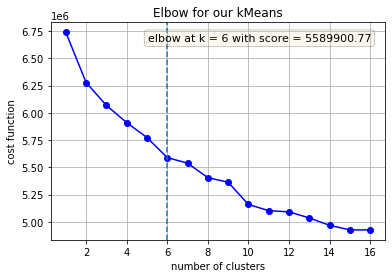

In [49]:
fig, ax = plt.subplots()
plt.plot(range(1,17), cost, '-bo')
plt.axvline(x = 6, ls = '--')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.2)
ax.text(0.29, 0.95, "elbow at k = {} with score = {:.2f}".format(6, cost[5]), transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=props)
plt.title('Elbow for our kMeans')
plt.xlabel('number of clusters')
plt.ylabel('cost function')
plt.grid(True)

From this plot we can say that the optimal number of cluster is k = 6, why after the k = 6 the cost function decrese more slowly.

## Silhoutte analysis

In [53]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt

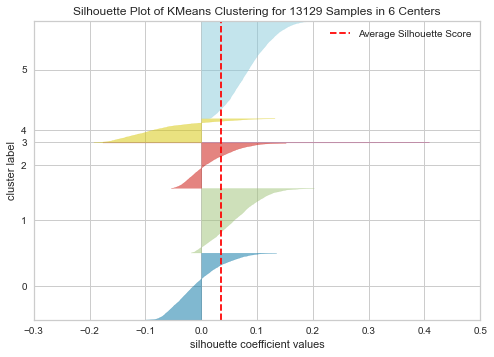

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 13129 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [40]:
model = KMeans(6, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(Principal)        # Fit the data to the visualizer
visualizer.show() 

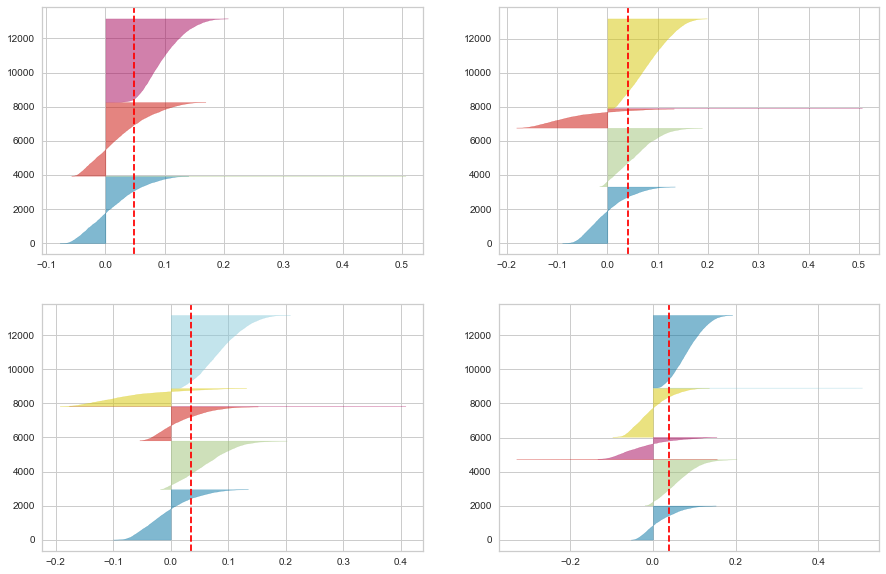

In [66]:
fig, ax = plt.subplots(2, 2, figsize=(15,10))

n_clust = [4, 5, 6, 7]
for i in n_clust:
    model = KMeans(n_clusters = i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(model, colors='yellowbrick', ax=ax[q-2][mod])
    visualizer.fit(Principal)

In [44]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [48]:
Silhoutte_score = []
for i in range(2, 13):
    model = KMeans(n_clusters=i,  init='k-means++', random_state=42)
    model.fit(Principal)
    score = silhouette_score(Principal, model.labels_)
    Silhoutte_score.append(score)
    print("Number clusters: {}, Silhouette score is {}".format(i, score))

Number clusters: 2, Silhouette score is 0.07547676964414408
Number clusters: 3, Silhouette score is 0.047413485788130136
Number clusters: 4, Silhouette score is 0.04806415912329984
Number clusters: 5, Silhouette score is 0.0411374784412609
Number clusters: 6, Silhouette score is 0.03542525227382431
Number clusters: 7, Silhouette score is 0.03816339500890499
Number clusters: 8, Silhouette score is 0.029784076489197443
Number clusters: 9, Silhouette score is 0.02998535866033167
Number clusters: 10, Silhouette score is 0.030103784616717744
Number clusters: 11, Silhouette score is 0.030041342815349068
Number clusters: 12, Silhouette score is 0.030774042011984352


## True kmeans

In [71]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [61]:
our_model = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)

In [62]:
our_model.fit(Principal)

KMeans(n_clusters=6, random_state=42)

In [79]:
y_true = our_model.predict(Principal)

In [80]:
print(y_true)

[5 2 5 ... 1 0 1]


In [63]:
visualizer = KElbowVisualizer(our_model, k = (2,20), metric = "distortion", timings = False)

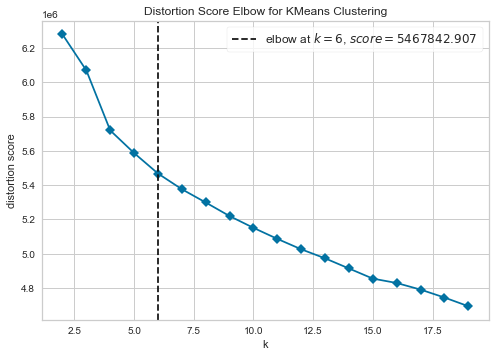

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [64]:
visualizer.fit(Principal)
visualizer.show()

# POINT 4

In [74]:
import pandas as pd

In [68]:
df = pd.read_csv('dataset_step.csv')

C:\Users\Giulio\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (815,817) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [87]:
df.head(3)

,track_id,audio_features_acousticness,audio_features_danceability,audio_features_energy,audio_features_instrumentalness,audio_features_liveness,audio_features_speechiness,audio_features_tempo,audio_features_valence,metadata_album_date,metadata_album_name,metadata_artist_latitude,metadata_artist_location,metadata_artist_longitude,metadata_artist_name,metadata_release,ranks_artist_discovery_rank,ranks_artist_familiarity_rank,ranks_artist_hotttnesss_rank,ranks_song_currency_rank,ranks_song_hotttnesss_rank,social_features_artist_discovery,social_features_artist_familiarity,social_features_artist_hotttnesss,social_features_song_currency,social_features_song_hotttnesss,temporal_features_000,temporal_features_001,temporal_features_002,temporal_features_003,temporal_features_004,temporal_features_005,temporal_features_006,temporal_features_007,temporal_features_008,temporal_features_009,temporal_features_010,temporal_features_011,temporal_features_012,temporal_features_013,temporal_features_014,temporal_features_015,temporal_features_016,temporal_features_017,temporal_features_018,temporal_features_019,temporal_features_020,temporal_features_021,temporal_features_022,temporal_features_023,temporal_features_024,temporal_features_025,temporal_features_026,temporal_features_027,temporal_features_028,temporal_features_029,temporal_features_030,temporal_features_031,temporal_features_032,temporal_features_033,temporal_features_034,temporal_features_035,temporal_features_036,temporal_features_037,temporal_features_038,temporal_features_039,temporal_features_040,temporal_features_041,temporal_features_042,temporal_features_043,temporal_features_044,temporal_features_045,temporal_features_046,temporal_features_047,temporal_features_048,temporal_features_049,temporal_features_050,temporal_features_051,temporal_features_052,temporal_features_053,temporal_features_054,temporal_features_055,temporal_features_056,temporal_features_057,temporal_features_058,temporal_features_059,temporal_features_060,temporal_features_061,temporal_features_062,temporal_features_063,temporal_features_064,temporal_features_065,temporal_features_066,temporal_features_067,temporal_features_068,temporal_features_069,temporal_features_070,temporal_features_071,temporal_features_072,temporal_features_073,temporal_features_074,temporal_features_075,temporal_features_076,temporal_features_077,temporal_features_078,temporal_features_079,temporal_features_080,temporal_features_081,temporal_features_082,temporal_features_083,temporal_features_084,temporal_features_085,temporal_features_086,temporal_features_087,temporal_features_088,temporal_features_089,temporal_features_090,temporal_features_091,temporal_features_092,temporal_features_093,temporal_features_094,temporal_features_095,temporal_features_096,temporal_features_097,temporal_features_098,temporal_features_099,temporal_features_100,temporal_features_101,temporal_features_102,temporal_features_103,temporal_features_104,temporal_features_105,temporal_features_106,temporal_features_107,temporal_features_108,temporal_features_109,temporal_features_110,temporal_features_111,temporal_features_112,temporal_features_113,temporal_features_114,temporal_features_115,temporal_features_116,temporal_features_117,temporal_features_118,temporal_features_119,temporal_features_120,temporal_features_121,temporal_features_122,temporal_features_123,temporal_features_124,temporal_features_125,temporal_features_126,temporal_features_127,temporal_features_128,temporal_features_129,temporal_features_130,temporal_features_131,temporal_features_132,temporal_features_133,temporal_features_134,temporal_features_135,temporal_features_136,temporal_features_137,temporal_features_138,temporal_features_139,temporal_features_140,temporal_features_141,temporal_features_142,temporal_features_143,temporal_features_144,temporal_features_145,temporal_features_146,temporal_features_147,temporal_features_148,temporal_features_149,temporal_features_150,tempor

In [88]:
date = ['track_date_created','album_date_created','album_date_released']

In [122]:
pattern = r'\b\d{4}\b'
dates = df['track_date_created'].apply(lambda row: re.search(pattern, row)[0])

In [123]:
dates.unique()

array(['2008', '2009'], dtype=object)

In [ ]:
cols = ['Country', 'track_language_code', ]

### transform

In [229]:
quintile_duration = list(df['track_duration'].describe()[4:7])
quintile_duration

[137.0, 200.0, 289.0]

In [230]:
def duration_range(row, quintile):
    if row <= quintile[0]:
        return 1
    if row <= quintile[1]:
        return 2
    if row <= quintile[2]:
        return 3
    if row >= quintile[2]:
        return 4

In [235]:
duration_cluster = df['track_duration'].apply(lambda row: duration_range(row, quintile_duration))

In [236]:
duration_cluster.unique()

array([2, 3, 4, 1], dtype=int64)

In [237]:
quintile_listens = list(df['track_listens'].describe()[4:7])
quintile_listens

[199.0, 464.0, 1079.0]

In [238]:
listens_cluster = df['track_listens'].apply(lambda row: duration_range(row, quintile_listens))

In [239]:
listens_cluster.unique()

array([4, 3, 2, 1], dtype=int64)

In [241]:
quintile_acousticness = list(df['audio_features_acousticness'].describe()[4:7])
quintile_acousticness

[0.1037725546, 0.5739848424, 0.9207269763]

In [242]:
acousticness_cluster = df['audio_features_acousticness'].apply(lambda row: duration_range(row, quintile_acousticness))

In [243]:
acousticness_cluster.unique()

array([2, 1, 4, 3], dtype=int64)

In [247]:
quintile_dance = list(df['audio_features_danceability'].describe()[4:7])
quintile_dance

[0.3447591127, 0.4856348139999999, 0.6290940727000001]

In [248]:
dance_cluster = df['audio_features_danceability'].apply(lambda row: duration_range(row, quintile_dance))

In [249]:
dance_cluster.unique()

array([4, 3, 1, 2], dtype=int64)

In [250]:
quintile_energy = list(df['audio_features_energy'].describe()[4:7])
quintile_energy

[0.3213003717, 0.5491128455, 0.7762541942]

In [251]:
energy_cluster = df['audio_features_energy'].apply(lambda row: duration_range(row, quintile_energy))

In [252]:
energy_cluster.unique()

array([3, 4, 1, 2], dtype=int64)

In [254]:
duration_cluster

0        2
1        3
2        3
3        2
4        4
        ..
13124    2
13125    3
13126    1
13127    4
13128    3
Name: track_duration, Length: 13129, dtype: int64

In [315]:
variable = [energy_cluster,duration_cluster,dance_cluster,acousticness_cluster,listens_cluster, df['Country'], df['track_language_code']]
name_var = ['energy feature','duration track','dance feature','acousticness feature','listens track', 'Country', 'Language']

for var,name in zip(variable,name_var):
    display(pd.crosstab(index = var, columns = prova, rownames = [name],
           colnames = ['clusters']).apply(lambda row: round(row/row.sum()*100,2), axis = 0).sort_values(by = 1, ascending=False))

clusters,1,2,3,4,5,6
energy feature,,,,,,
2,27.28,9.14,23.53,25.56,29.88,26.46
3,25.91,22.34,41.18,26.46,24.32,26.28
1,23.55,6.95,5.88,22.51,32.86,28.95
4,23.27,61.57,29.41,25.47,12.94,18.31


clusters,1,2,3,4,5,6
duration track,,,,,,
2,26.59,25.62,23.53,18.55,27.80,21.27
4,25.74,26.02,11.76,10.14,21.15,35.27
3,25.09,25.87,17.65,13.36,26.45,26.79
1,22.59,22.49,47.06,57.96,24.60,16.67


clusters,1,2,3,4,5,6
dance feature,,,,,,
4,29.33,5.76,23.53,22.92,30.64,26.75
3,27.14,16.39,35.29,24.90,27.42,25.29
2,23.24,27.01,29.41,27.78,23.70,26.13
1,20.29,50.84,11.76,24.40,18.24,21.82


clusters,1,2,3,4,5,6
acousticness feature,,,,,,
1,26.63,36.15,17.65,23.41,21.15,21.78
2,26.18,24.08,29.41,24.81,24.11,25.84
3,24.47,22.94,35.29,26.96,25.76,24.96
4,22.72,16.83,17.65,24.81,28.98,27.41


clusters,1,2,3,4,5,6
listens track,,,,,,
4,36.00,22.94,0.00,16.24,19.75,26.86
3,25.94,23.63,35.29,21.93,25.34,25.58
2,20.12,27.71,35.29,27.95,27.61,22.92
1,17.93,25.72,29.41,33.88,27.30,24.63


clusters,1,2,3,4,5,6
Country,,,,,,
United States,57.40,67.58,81.82,58.99,56.98,57.27
United Kingdom,9.97,7.54,9.09,10.45,10.62,8.57
Deutschland,3.19,2.74,0.00,3.48,3.54,4.36
France,3.10,3.24,0.00,2.81,3.67,3.85
Canada,2.78,2.37,0.00,5.73,2.82,2.79
...,...,...,...,...,...,...
Uruguay,0.00,0.06,0.00,0.00,0.13,0.20
Philippines,0.00,0.06,0.00,0.00,0.07,0.00
Rwanda,0.00,0.00,0.00,0.00,0.20,0.05


clusters,1,2,3,4,5,6
Language,,,,,,
en,96.64,98.46,100.0,99.17,97.70,97.68
es,0.45,0.84,0.0,0.08,0.83,1.07
fr,0.41,0.20,0.0,0.33,0.24,0.48
ar,0.34,0.05,0.0,0.00,0.00,0.00
bg,0.24,0.00,0.0,0.00,0.00,0.00
tr,0.21,0.05,0.0,0.17,0.31,0.11
sw,0.21,0.00,0.0,0.00,0.00,0.00
it,0.17,0.05,0.0,0.00,0.17,0.11
nl,0.14,0.00,0.0,0.00,0.00,0.00


# Compare the true genre

In [69]:
genre = df['track_genre_top'].fillna('NA').unique()
genre

array(['Hip-Hop', 'Pop', 'NA', 'Rock', 'Experimental', 'Folk', 'Jazz',
       'Electronic', 'Spoken', 'International', 'Soul-RnB', 'Blues',
       'Country', 'Classical', 'Old-Time / Historic', 'Instrumental',
       'Easy Listening'], dtype=object)

In [75]:
genre_cluster_Class = Kmeans(Principal, k = 16)[0]

In [76]:
genre_clusters = np.zeros(Principal.shape[0], dtype = np.int64)

In [79]:
genre_clusters

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [81]:
for clust,lis in genre_cluster_Class.items():
    for value in lis:
        genre_clusters[value] = clust

In [83]:
genre_clusters = genre_clusters + 1

In [86]:
our_model = KMeans(n_clusters = 16, init = 'k-means++', random_state = 42)
our_model.fit(Principal)
y_true = our_model.predict(Principal)

In [88]:
display(pd.crosstab(index = y_true, columns = genre_clusters, rownames = ['Genre'],
           colnames = ['clusters']).apply(lambda row: round(row/row.sum()*100,2), axis = 0))

clusters,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Genre,,,,,,,,,,,,,,,,
0,0.00,39.76,0.09,2.33,24.0,4.08,0.00,0.0,72.12,1.57,2.43,3.45,0.00,0.00,0.00,6.65
1,0.21,1.96,0.61,10.08,16.0,0.00,0.12,0.0,1.01,87.45,7.60,0.00,0.00,0.00,0.00,3.32
2,0.85,0.00,0.00,0.00,0.0,0.00,0.00,99.3,0.00,0.00,2.13,0.00,0.00,0.00,0.00,0.00
3,0.00,6.48,48.95,7.84,8.0,0.73,0.00,0.0,0.00,0.47,27.05,2.55,0.00,0.00,0.00,69.94
4,0.00,0.00,0.17,0.65,8.0,0.00,3.34,0.0,1.09,0.08,2.13,89.91,0.00,0.00,0.00,1.66
5,0.00,0.85,0.09,6.44,0.0,85.40,0.35,0.0,0.65,1.49,4.56,0.00,0.54,0.00,0.00,3.32
6,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,17.65,0.00
7,0.00,0.00,0.00,0.09,0.0,0.16,0.00,0.0,0.00,0.00,0.30,0.13,98.39,0.00,0.00,0.00
8,0.00,50.94,35.58,0.00,28.0,0.00,0.00,0.0,0.00,0.00,2.43,1.28,0.00,0.00,0.00,0.63
